# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

### Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

#### Import the mnist dataset from keras datasets

In [186]:
from keras.datasets import mnist

In [187]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

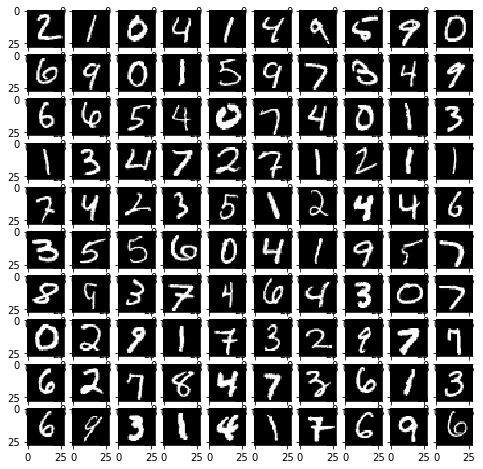

In [188]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = x_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

#### Creating two datasets one with digits below 5 and one with 5 and above

In [189]:
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gt5 = x_train[y_train >= 5]
y_train_gt5 = y_train[y_train >= 5] - 5  # make classes start at 0 for
x_test_gt5 = x_test[y_test >= 5]         # np_utils.to_categorical
y_test_gt5 = y_test[y_test >= 5] - 5

### Check 

Verify shapes of x_train, y_train, x_test and y_test for both the datasets with the below given shapes.

In [190]:
x_train.shape

(60000, 28, 28)

In [191]:
y_train.shape

(60000,)

In [192]:
x_test.shape

(10000, 28, 28)

In [193]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [194]:
print(x_train_lt5.shape)
print(y_train_lt5.shape)
print(x_test_lt5.shape)
print(y_test_lt5.shape)

(30596, 28, 28)
(30596,)
(5139, 28, 28)
(5139,)


In [195]:
print(x_train_gt5.shape)
print(y_train_gt5.shape)
print(x_test_gt5.shape)
print(y_test_gt5.shape)

(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)


### Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST
### Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [196]:
#Reshape data from 3D to 4D -> No of rows, 28X28 X no of channels
x_train_lt5 = x_train_lt5.reshape(x_train_lt5.shape[0],28,28,1) 
x_test_lt5= x_test_lt5.reshape(x_test_lt5.shape[0],28,28,1) 

In [197]:
x_train_lt5.shape

(30596, 28, 28, 1)

In [198]:
x_test_lt5.shape

(5139, 28, 28, 1)

### Change into float32 datatype and Normalize x_train and x_test by dividing it by 255.0

In [199]:
x_train_lt5=x_train_lt5.astype('float32')
x_test_lt5=x_test_lt5.astype('float32')

In [200]:
x_train_lt5.dtype

dtype('float32')

In [201]:
x_test_lt5.dtype

dtype('float32')

In [202]:
x_train_lt5 /= 255

In [203]:
x_test_lt5 /= 255

### Check

Verify the shapes of the X_train and X_test with the shapes given below.

In [204]:
print('X_train_lt5 shape:', x_train_lt5.shape)
print('X_test_lt5 shape:', x_test_lt5.shape)

X_train_lt5 shape: (30596, 28, 28, 1)
X_test_lt5 shape: (5139, 28, 28, 1)


### Use One-hot encoding to divide y_train and y_test into required no of output classes

In [205]:
from keras.utils import to_categorical

In [206]:
y_train_lt5

array([0, 4, 1, ..., 2, 1, 3], dtype=uint8)

In [207]:
y_train_lt5=to_categorical(y_train_lt5,num_classes=5)

In [208]:
y_train_lt5

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [209]:
y_test_lt5

array([2, 1, 0, ..., 2, 3, 4], dtype=uint8)

In [210]:
y_test_lt5=to_categorical(y_test_lt5,num_classes=5)

In [211]:
y_test_lt5.shape

(5139, 5)

### Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [212]:
from __future__ import absolute_import, division, print_function
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

In [213]:
#Define/Initialize Sequential model
model = Sequential()

In [214]:
# Conv2D Layer
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))

In [215]:
# Max Pooling 
model.add(MaxPooling2D(pool_size=(2,2)))


# Dropout Layer
model.add(Dropout(0.1))


### Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [216]:
# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128,activation='relu'))

In [217]:
# Dropout Layer
model.add(Dropout(0.1))

In [218]:
# Prediction Layer
model.add(Dense(5,activation='softmax'))

# Loss and Optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [219]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)              

### Print the training and test accuracy for 5 epochs

In [220]:
model.fit(x_train_lt5, y_train_lt5, batch_size=128, epochs=5, 
            validation_data=(x_test_lt5, y_test_lt5))

Train on 30596 samples, validate on 5139 samples
Epoch 1/5
30596/30596 [==============================] - 9s 288us/step - loss: 0.1262 - acc: 0.9621 - val_loss: 0.0285 - val_acc: 0.9912
Epoch 2/5
30596/30596 [==============================] - 8s 272us/step - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0223 - val_acc: 0.9926
Epoch 3/5
30596/30596 [==============================] - 8s 271us/step - loss: 0.0228 - acc: 0.9933 - val_loss: 0.0201 - val_acc: 0.9932
Epoch 4/5
30596/30596 [==============================] - 8s 272us/step - loss: 0.0168 - acc: 0.9950 - val_loss: 0.0136 - val_acc: 0.9955
Epoch 5/5
30596/30596 [==============================] - 9s 297us/step - loss: 0.0114 - acc: 0.9965 - val_loss: 0.0134 - val_acc: 0.9951


### Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

### Make only the dense layers to be trainable and convolutional layers to be non-trainable

#### Check model summary to see model layer names

In [221]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)              

In [222]:
for layers in model.layers:
    print(layers.name)
    if('dense' not in layers.name):
        layers.trainable = False
        print(layers.name + 'is not trainable\n')
    if('dense' in layers.name):
        print(layers.name + ' is trainable\n')

conv2d_7
conv2d_7is not trainable

activation_7
activation_7is not trainable

max_pooling2d_7
max_pooling2d_7is not trainable

dropout_13
dropout_13is not trainable

flatten_7
flatten_7is not trainable

dense_13
dense_13 is trainable

dropout_14
dropout_14is not trainable

dense_14
dense_14 is trainable



### Do the required preprocessing for `x_train_gt5` also same as `x_train_lt5` and for `y_train_gt5` same as `y_train_lt5`

1. Reshape
2. Change to float32 datatype
3. Normalize (dividing with 255)
4. y_train and y_test Convert into one-hot vectors

In [223]:
#Reshape data from 3D to 4D -> No of rows, 28X28 X no of channels
x_train_gt5 = x_train_gt5.reshape(x_train_gt5.shape[0],28,28,1) 
x_test_gt5= x_test_gt5.reshape(x_test_gt5.shape[0],28,28,1) 

In [224]:
x_train_gt5=x_train_gt5.astype('float32')
x_test_gt5=x_test_gt5.astype('float32')

In [225]:
x_train_gt5 /= 255
x_test_gt5 /= 255

In [226]:
y_train_gt5=to_categorical(y_train_gt5,num_classes=5)
y_test_gt5=to_categorical(y_test_gt5,num_classes=5)

### Check

Verify the shapes with the given below.

In [227]:
print(x_train_gt5.shape)
print(y_train_gt5.shape)
print(x_test_gt5.shape)
print(y_test_gt5.shape)

(29404, 28, 28, 1)
(29404, 5)
(4861, 28, 28, 1)
(4861, 5)


## Print the accuracy for classification of digits 5 to 9

In [228]:
#Define/Initialize Sequential model
model1 = Sequential()

# Conv2D Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# Max Pooling 
model1.add(MaxPooling2D(pool_size=(2,2)))

# Dropout Layer
model1.add(Dropout(0.1))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))

# Dropout Layer
model1.add(Dropout(0.1))


# Prediction Layer
model1.add(Dense(5,activation='softmax'))


In [229]:
for layers in model1.layers:
    print(layers.name)
    if('dense' not in layers.name):
        layers.trainable = False
        print(layers.name + 'is not trainable\n')
    if('dense' in layers.name):
        print(layers.name + ' is trainable\n')

conv2d_8
conv2d_8is not trainable

activation_8
activation_8is not trainable

max_pooling2d_8
max_pooling2d_8is not trainable

dropout_15
dropout_15is not trainable

flatten_8
flatten_8is not trainable

dense_15
dense_15 is trainable

dropout_16
dropout_16is not trainable

dense_16
dense_16 is trainable



In [230]:
model1.set_weights(model.get_weights())

In [231]:
# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [232]:
model1.fit(x_train_gt5, y_train_gt5, batch_size=128, epochs=5, 
            validation_data=(x_test_gt5, y_test_gt5))

Train on 29404 samples, validate on 4861 samples
Epoch 1/5
29404/29404 [==============================] - 5s 181us/step - loss: 0.3395 - acc: 0.9058 - val_loss: 0.0775 - val_acc: 0.9768
Epoch 2/5
29404/29404 [==============================] - 5s 164us/step - loss: 0.0728 - acc: 0.9770 - val_loss: 0.0480 - val_acc: 0.9848
Epoch 3/5
29404/29404 [==============================] - 5s 164us/step - loss: 0.0490 - acc: 0.9851 - val_loss: 0.0377 - val_acc: 0.9881
Epoch 4/5
29404/29404 [==============================] - 5s 159us/step - loss: 0.0375 - acc: 0.9885 - val_loss: 0.0392 - val_acc: 0.9870
Epoch 5/5
29404/29404 [==============================] - 5s 160us/step - loss: 0.0293 - acc: 0.9912 - val_loss: 0.0279 - val_acc: 0.9914


In [233]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               692352    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)              

# NLP - Text classification using TF-IDF

###  Load the dataset from sklearn.datasets

In [234]:
from sklearn.datasets import fetch_20newsgroups

In [235]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### Training data

In [236]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### Test data

In [237]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [238]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [239]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [240]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [241]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [242]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
x_dtm_train = vect.fit_transform(twenty_train.data)
x_dtm_test=vect.transform(twenty_test.data)
features = vect.get_feature_names()

In [243]:
x_dtm_train.shape

(2257, 35482)

In [244]:
x_dtm_test.shape

(1502, 35482)

In [245]:
dtm.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [246]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(x_dtm_train, twenty_train.target)
y_pred_class = logreg.predict(x_dtm_test)
print(metrics.accuracy_score(twenty_test.target, y_pred_class))

0.9280958721704394
